# Lab 2.1: Logistic Regression Implementation

**Duration:** 45 minutes

## Learning Objectives
By the end of this lab, you will be able to:
- Understand the mathematical foundation of logistic regression
- Implement logistic regression from scratch using NumPy
- Apply sigmoid activation function in practice
- Understand the relationship between linear and logistic regression

## Prerequisites
- Python 3.8+
- NumPy
- Matplotlib
- Jupyter Notebook/Lab

## Overview
Logistic regression is a fundamental algorithm for binary classification. Unlike linear regression which predicts continuous values, logistic regression predicts probabilities between 0 and 1 using the sigmoid function. This lab will guide you through implementing logistic regression from scratch to build a solid foundation for understanding neural networks.

## Step 1: Environment Setup and Imports

Let's start by importing the necessary libraries and setting up our environment.

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set matplotlib style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("Environment setup complete!")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Environment setup complete!
NumPy version: 2.3.2
Matplotlib version: 3.10.5


## Step 2: Understanding the Sigmoid Function

The sigmoid function is the heart of logistic regression. It maps any real number to a value between 0 and 1, making it perfect for probability estimation.

**Mathematical Formula:** σ(z) = 1 / (1 + e^(-z))

Let's implement and visualize the sigmoid function:

In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size
    
    Returns:
    s -- sigmoid(z)
    """
    # Implement sigmoid function
    # Tip: Use np.exp() for exponential function
    s = 1 / (1 + np.exp(-z))
    
    return s

# Test the sigmoid function
test_values = np.array([-10, -5, -2, 0, 2, 5, 10])
sigmoid_results = sigmoid(test_values)

print("Input values:", test_values)
print("Sigmoid outputs:", sigmoid_results)
print("\nKey observations:")
print(f"- sigmoid(0) = {sigmoid(0):.3f}")
print(f"- As z → ∞, sigmoid(z) → {sigmoid(100):.6f}")
print(f"- As z → -∞, sigmoid(z) → {sigmoid(-100):.6f}")

Input values: [-10  -5  -2   0   2   5  10]
Sigmoid outputs: [4.53978687e-05 6.69285092e-03 1.19202922e-01 5.00000000e-01
 8.80797078e-01 9.93307149e-01 9.99954602e-01]

Key observations:
- sigmoid(0) = 0.500
- As z → ∞, sigmoid(z) → 1.000000
- As z → -∞, sigmoid(z) → 0.000000


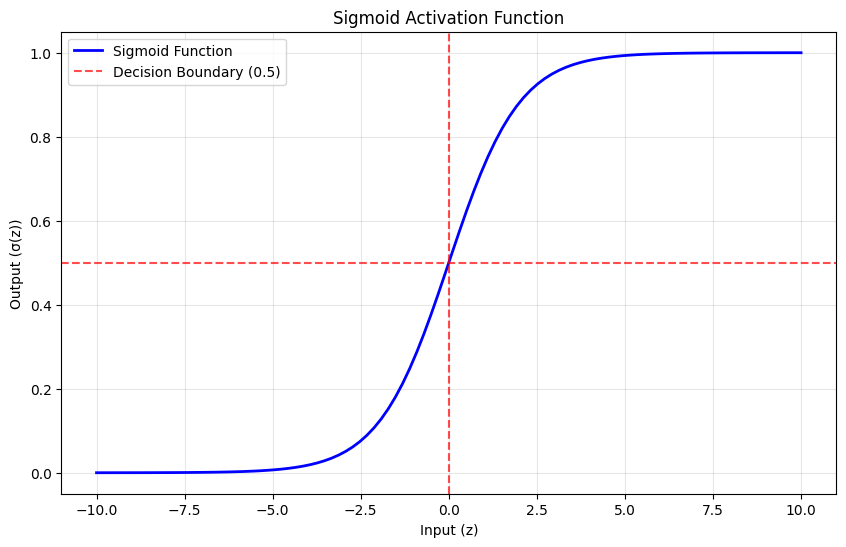

✓ Sigmoid function implemented and visualized successfully!


In [8]:
# Visualize the sigmoid function
z = np.linspace(-10, 10, 100)
s = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, s, 'b-', linewidth=2, label='Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.xlabel('Input (z)')
plt.ylabel('Output (σ(z))')
plt.title('Sigmoid Activation Function')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Boundary (0.5)')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("✓ Sigmoid function implemented and visualized successfully!")

## Step 3: Generate Sample Dataset

Let's create a binary classification dataset to work with. We'll use scikit-learn's `make_classification` function to generate a 2D dataset that's perfect for visualization.

In [9]:
# Generate a binary classification dataset
def generate_dataset(n_samples=1000, n_features=2, flip_y=0.1, random_state=42):
    """
    Generate a binary classification dataset
    
    Arguments:
    n_samples -- number of samples to generate
    n_features -- number of features (we'll use 2 for visualization)
    flip_y -- fraction of samples whose class is assigned randomly (adds noise)
    random_state -- random seed for reproducibility
    
    Returns:
    X -- feature matrix (n_samples, n_features)
    y -- target vector (n_samples,)
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_redundant=0,
        n_informative=2,
        n_clusters_per_class=1,
        flip_y=flip_y,
        random_state=random_state
    )
    
    return X, y

# Generate dataset
X, y = generate_dataset()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset generated successfully!")
print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Class distribution in training: {np.bincount(y_train)}")
print(f"Class distribution in test: {np.bincount(y_test)}")

Dataset generated successfully!
Training set: 800 samples, 2 features
Test set: 200 samples
Class distribution in training: [402 398]
Class distribution in test: [100 100]


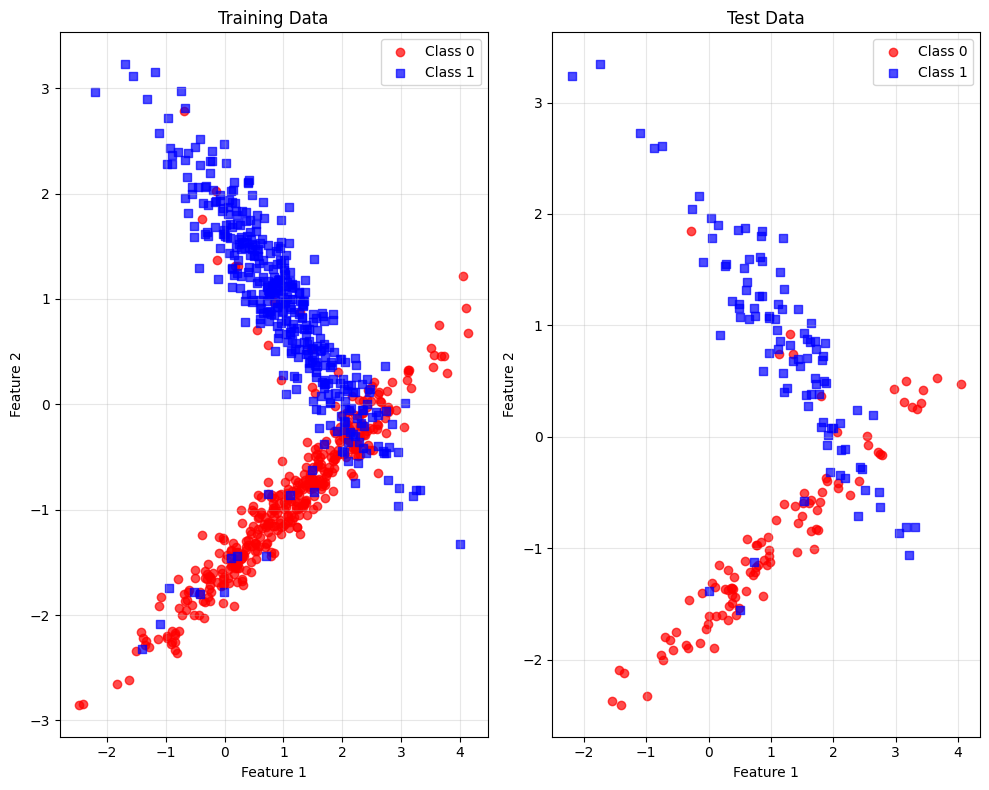

✓ Dataset visualized successfully!


In [10]:
# Visualize the dataset
plt.figure(figsize=(10, 8))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           c='red', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
           c='blue', marker='s', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot test data
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
           c='red', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
           c='blue', marker='s', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Dataset visualized successfully!")

## Step 4: Implement Logistic Regression Class

Now let's implement a complete logistic regression class from scratch. This will include:
- Forward propagation (prediction)
- Cost function computation
- Backward propagation (gradients)
- Parameter updates

In [11]:
class LogisticRegression:
    """
    Logistic Regression implementation from scratch
    """
    
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        """
        Initialize the logistic regression model
        
        Arguments:
        learning_rate -- step size for gradient descent
        max_iterations -- maximum number of training iterations
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.costs = []
    
    def _add_bias_column(self, X):
        """
        Add bias column to the feature matrix
        
        Arguments:
        X -- input features (m, n)
        
        Returns:
        X_with_bias -- features with bias column (m, n+1)
        """
        m = X.shape[0]
        bias_column = np.ones((m, 1))
        return np.concatenate([bias_column, X], axis=1)
    
    def _sigmoid(self, z):
        """
        Compute sigmoid function
        
        Arguments:
        z -- input to sigmoid function
        
        Returns:
        sigmoid output
        """
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _forward_propagation(self, X):
        """
        Perform forward propagation
        
        Arguments:
        X -- input features (m, n)
        
        Returns:
        A -- predictions (probabilities) (m, 1)
        """
        # Add bias column
        X_with_bias = self._add_bias_column(X)
        
        # Compute linear combination: z = X * weights
        z = np.dot(X_with_bias, self.weights)
        
        # Apply sigmoid activation
        A = self._sigmoid(z)
        
        return A, X_with_bias
    
    def _compute_cost(self, A, y):
        """
        Compute the logistic regression cost function
        
        Arguments:
        A -- predictions (m, 1)
        y -- true labels (m, 1)
        
        Returns:
        cost -- logistic regression cost
        """
        m = y.shape[0]
        
        # Ensure A is in valid range to prevent log(0)
        A = np.clip(A, 1e-15, 1 - 1e-15)
        
        # Compute cost: J = -1/m * sum(y*log(A) + (1-y)*log(1-A))
        cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
        
        return cost
    
    def _backward_propagation(self, X_with_bias, A, y):
        """
        Perform backward propagation to compute gradients
        
        Arguments:
        X_with_bias -- input features with bias (m, n+1)
        A -- predictions (m, 1)
        y -- true labels (m, 1)
        
        Returns:
        dw -- gradients of weights (n+1, 1)
        """
        m = y.shape[0]
        
        # Compute gradients: dw = 1/m * X^T * (A - y)
        dw = 1/m * np.dot(X_with_bias.T, (A - y))
        
        return dw
    
    def fit(self, X, y):
        """
        Train the logistic regression model
        
        Arguments:
        X -- training features (m, n)
        y -- training labels (m,) or (m, 1)
        """
        # Convert y to column vector if necessary
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        
        # Initialize parameters
        n_features = X.shape[1]
        self.weights = np.zeros((n_features + 1, 1))  # +1 for bias
        self.costs = []
        
        # Training loop
        for i in range(self.max_iterations):
            # Forward propagation
            A, X_with_bias = self._forward_propagation(X)
            
            # Compute cost
            cost = self._compute_cost(A, y)
            self.costs.append(cost)
            
            # Backward propagation
            dw = self._backward_propagation(X_with_bias, A, y)
            
            # Update parameters
            self.weights = self.weights - self.learning_rate * dw
            
            # Print progress
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost:.6f}")
    
    def predict_proba(self, X):
        """
        Predict class probabilities
        
        Arguments:
        X -- input features (m, n)
        
        Returns:
        probabilities -- predicted probabilities (m, 1)
        """
        A, _ = self._forward_propagation(X)
        return A
    
    def predict(self, X, threshold=0.5):
        """
        Make binary predictions
        
        Arguments:
        X -- input features (m, n)
        threshold -- decision threshold
        
        Returns:
        predictions -- binary predictions (m, 1)
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

print("✓ LogisticRegression class implemented successfully!")

✓ LogisticRegression class implemented successfully!


## Step 5: Train the Model

Now let's train our logistic regression model on the dataset we generated.

In [12]:
# Create and train the model
model = LogisticRegression(learning_rate=0.1, max_iterations=1000)

print("Training logistic regression model...")
print("=" * 50)

# Train the model
model.fit(X_train, y_train)

print("=" * 50)
print("Training completed!")

# Display final parameters
print(f"\nFinal model parameters:")
print(f"Bias (w0): {model.weights[0, 0]:.4f}")
print(f"Weight 1 (w1): {model.weights[1, 0]:.4f}")
print(f"Weight 2 (w2): {model.weights[2, 0]:.4f}")
print(f"Final cost: {model.costs[-1]:.6f}")

Training logistic regression model...
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.365867
Cost after iteration 200: 0.350737
Cost after iteration 300: 0.347310
Cost after iteration 400: 0.346050
Cost after iteration 500: 0.345418
Cost after iteration 600: 0.345034
Cost after iteration 700: 0.344776
Cost after iteration 800: 0.344595
Cost after iteration 900: 0.344465
Training completed!

Final model parameters:
Bias (w0): 0.5448
Weight 1 (w1): -0.2971
Weight 2 (w2): 2.2747
Final cost: 0.344371


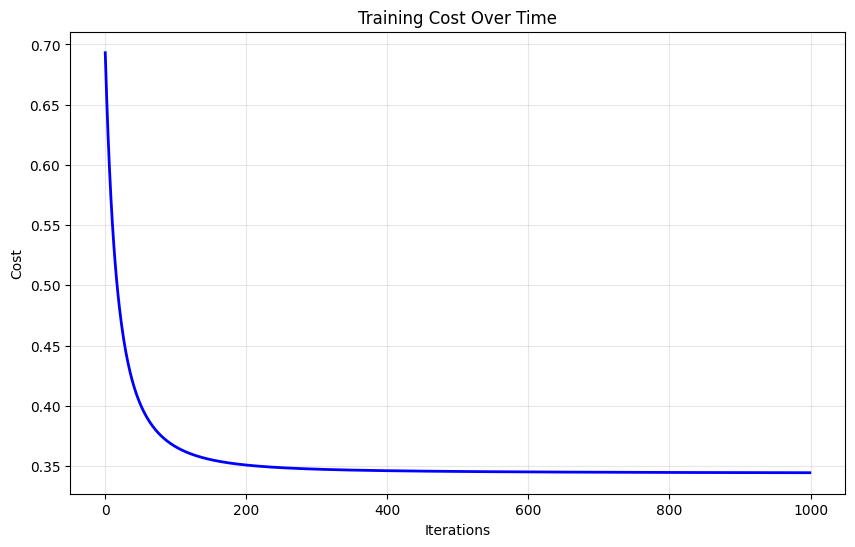

✓ Training cost visualization completed!


In [13]:
# Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(model.costs, 'b-', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Cost Over Time')
plt.grid(True, alpha=0.3)
plt.show()

print("✓ Training cost visualization completed!")

## Step 6: Model Evaluation

Let's evaluate our model's performance on both training and test sets.

In [14]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_probabilities = model.predict_proba(X_train)
test_probabilities = model.predict_proba(X_test)

# Calculate accuracy
def calculate_accuracy(y_true, y_pred):
    if y_true.ndim == 1:
        y_true = y_true.reshape(-1, 1)
    return np.mean(y_true == y_pred) * 100

train_accuracy = calculate_accuracy(y_train, train_predictions)
test_accuracy = calculate_accuracy(y_test, test_predictions)

print("Model Performance:")
print("=" * 30)
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Display some example predictions
print("\nExample Predictions (first 10 test samples):")
print("=" * 50)
print("True Label | Predicted | Probability")
print("-" * 35)
for i in range(10):
    true_label = y_test[i]
    pred_label = test_predictions[i, 0]
    probability = test_probabilities[i, 0]
    print(f"    {true_label}      |     {pred_label}     |   {probability:.3f}")

Model Performance:
Training Accuracy: 87.50%
Test Accuracy: 82.50%

Example Predictions (first 10 test samples):
True Label | Predicted | Probability
-----------------------------------
    1      |     1     |   0.536
    0      |     0     |   0.049
    0      |     0     |   0.253
    0      |     0     |   0.216
    1      |     1     |   0.986
    1      |     1     |   0.884
    1      |     1     |   0.835
    1      |     0     |   0.041
    0      |     0     |   0.136
    0      |     0     |   0.043


## Step 7: Visualize Decision Boundary

Let's visualize how our logistic regression model separates the two classes by plotting the decision boundary.

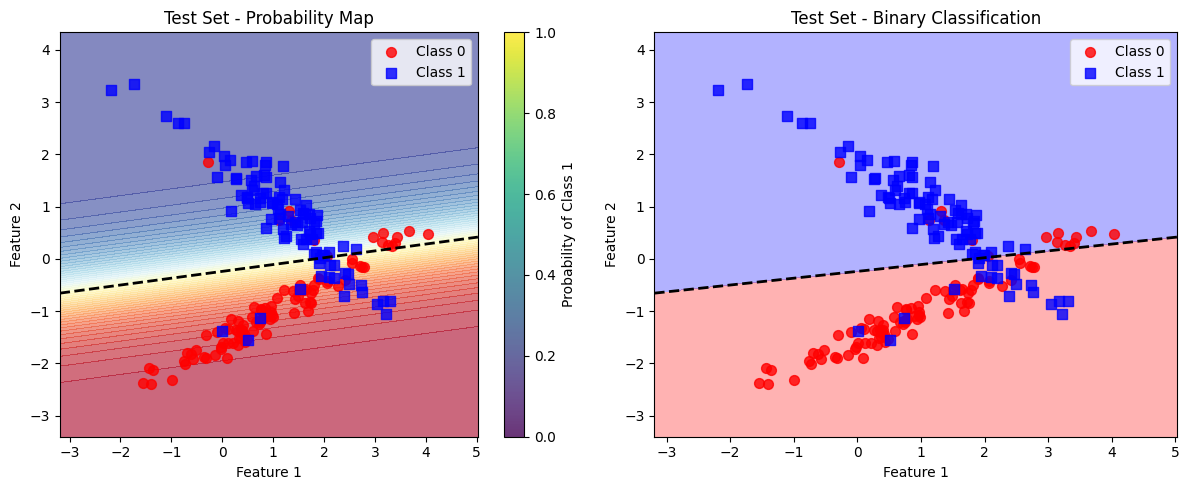

✓ Decision boundary visualization completed!


In [15]:
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """
    Plot the decision boundary of the logistic regression model
    
    Arguments:
    X -- input features (m, 2)
    y -- true labels (m,)
    model -- trained logistic regression model
    title -- plot title
    """
    plt.figure(figsize=(12, 5))
    
    # Create a mesh for plotting decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict_proba(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and predictions
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    
    # Plot data points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='o', 
               s=50, alpha=0.8, label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='s', 
               s=50, alpha=0.8, label='Class 1')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{title} - Probability Map')
    plt.legend()
    plt.colorbar(label='Probability of Class 1')
    
    # Plot binary decision boundary
    plt.subplot(1, 2, 2)
    Z_binary = (Z >= 0.5).astype(int)
    plt.contourf(xx, yy, Z_binary, levels=1, alpha=0.3, colors=['red', 'blue'])
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    
    # Plot data points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='o', 
               s=50, alpha=0.8, label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='s', 
               s=50, alpha=0.8, label='Class 1')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{title} - Binary Classification')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot decision boundary for test data
plot_decision_boundary(X_test, y_test, model, "Test Set")
print("✓ Decision boundary visualization completed!")

## Step 8: Understanding the Mathematics

Let's dive deeper into the mathematical concepts behind logistic regression.

In [ ]:
# Analyze the decision boundary equation
print("Mathematical Analysis of Our Trained Model")
print("=" * 50)

w0, w1, w2 = model.weights[0, 0], model.weights[1, 0], model.weights[2, 0]

print(f"Decision boundary equation: {w0:.3f} + {w1:.3f}*x1 + {w2:.3f}*x2 = 0")
print(f"Rearranged: x2 = {-w0/w2:.3f} + {-w1/w2:.3f}*x1")
print(f"\nSlope of decision boundary: {-w1/w2:.3f}")
print(f"Y-intercept of decision boundary: {-w0/w2:.3f}")

# Calculate odds ratio
print(f"\nWeight interpretation:")
print(f"- For 1 unit increase in Feature 1, odds multiply by: {np.exp(w1):.3f}")
print(f"- For 1 unit increase in Feature 2, odds multiply by: {np.exp(w2):.3f}")

# Demonstrate prediction for a new point
new_point = np.array([[0, 0]])
prob = model.predict_proba(new_point)[0, 0]
pred = model.predict(new_point)[0, 0]

print(f"\nPrediction for point (0, 0):")
print(f"Probability of Class 1: {prob:.3f}")
print(f"Predicted Class: {pred}")
print(f"Odds: {prob/(1-prob):.3f}")

## Step 9: Compare with Different Learning Rates

Let's explore how different learning rates affect the training process.

In [ ]:
# Test different learning rates
learning_rates = [0.01, 0.1, 0.5, 1.0]
colors = ['red', 'blue', 'green', 'orange']

plt.figure(figsize=(15, 5))

# Training with different learning rates
models = {}
for i, lr in enumerate(learning_rates):
    print(f"Training with learning rate: {lr}")
    
    model_lr = LogisticRegression(learning_rate=lr, max_iterations=500)
    model_lr.fit(X_train, y_train)
    models[lr] = model_lr
    
    # Plot cost curve
    plt.subplot(1, 3, 1)
    plt.plot(model_lr.costs, color=colors[i], label=f'LR = {lr}', linewidth=2)

plt.subplot(1, 3, 1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Different Learning Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization

# Compare accuracies
train_accuracies = []
test_accuracies = []

for lr in learning_rates:
    model_lr = models[lr]
    train_acc = calculate_accuracy(y_train, model_lr.predict(X_train))
    test_acc = calculate_accuracy(y_test, model_lr.predict(X_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.subplot(1, 3, 2)
x_pos = np.arange(len(learning_rates))
plt.bar(x_pos - 0.2, train_accuracies, 0.4, label='Train', alpha=0.7, color='blue')
plt.bar(x_pos + 0.2, test_accuracies, 0.4, label='Test', alpha=0.7, color='red')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy vs Learning Rate')
plt.xticks(x_pos, learning_rates)
plt.legend()
plt.grid(True, alpha=0.3)

# Final costs comparison
final_costs = [models[lr].costs[-1] for lr in learning_rates]

plt.subplot(1, 3, 3)
plt.bar(learning_rates, final_costs, alpha=0.7, color='green')
plt.xlabel('Learning Rate')
plt.ylabel('Final Cost')
plt.title('Final Training Cost vs Learning Rate')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nLearning Rate Comparison Results:")
print("=" * 40)
for i, lr in enumerate(learning_rates):
    print(f"LR = {lr:4.2f}: Train Acc = {train_accuracies[i]:5.1f}%, "
          f"Test Acc = {test_accuracies[i]:5.1f}%, Final Cost = {final_costs[i]:.4f}")

print("\n✓ Learning rate comparison completed!")

## Progress Tracking Checklist

Mark each completed section:

- [ ] ✅ **Environment Setup**: Imported libraries and set up environment
- [ ] ✅ **Sigmoid Function**: Implemented and visualized sigmoid function
- [ ] ✅ **Dataset Generation**: Created and visualized binary classification dataset
- [ ] ✅ **LogisticRegression Class**: Implemented complete logistic regression from scratch
- [ ] ✅ **Model Training**: Trained the model and visualized cost function
- [ ] ✅ **Model Evaluation**: Calculated accuracy and analyzed predictions
- [ ] ✅ **Decision Boundary**: Visualized decision boundary and probability maps
- [ ] ✅ **Mathematical Analysis**: Understood weights, odds ratios, and decision equation
- [ ] ✅ **Learning Rate Study**: Compared different learning rates and their effects

## Key Concepts Summary

**Core Concepts Learned:**
1. **Sigmoid Function**: Maps any real number to probability (0-1 range)
2. **Logistic Regression**: Uses sigmoid to model probability of binary classification
3. **Cost Function**: Cross-entropy loss measures prediction quality
4. **Gradient Descent**: Iteratively updates weights to minimize cost
5. **Decision Boundary**: Linear separator in feature space where P(y=1) = 0.5
6. **Learning Rate**: Controls step size in gradient descent optimization

**Mathematical Relationships:**
- Linear combination: z = w₀ + w₁x₁ + w₂x₂
- Probability: P(y=1) = σ(z) = 1/(1 + e⁻ᶻ)
- Cost: J = -1/m Σ[y log(ŷ) + (1-y) log(1-ŷ)]
- Gradient: ∂J/∂w = 1/m Xᵀ(A - y)

## Troubleshooting

**Common Issues and Solutions:**

1. **Overflow in Exponential Function**
   - *Problem*: `np.exp()` returns inf for large negative values
   - *Solution*: Clip input values to prevent overflow (implemented in our sigmoid)

2. **Log of Zero in Cost Function**
   - *Problem*: `np.log(0)` returns -inf
   - *Solution*: Clip predictions to small epsilon values (1e-15 to 1-1e-15)

3. **Slow Convergence**
   - *Problem*: Cost decreases very slowly
   - *Solutions*: Increase learning rate, normalize features, or increase iterations

4. **Poor Performance**
   - *Problem*: Low accuracy on test set
   - *Solutions*: Check data quality, try feature engineering, or adjust threshold

5. **Divergent Training**
   - *Problem*: Cost increases instead of decreasing
   - *Solution*: Reduce learning rate or check gradient computation

## Validation Steps

**Verify Your Implementation:**
1. ✅ Sigmoid function outputs values between 0 and 1
2. ✅ Cost decreases over training iterations
3. ✅ Model achieves reasonable accuracy (>70% for this dataset)
4. ✅ Decision boundary is linear and separates classes reasonably
5. ✅ Different learning rates show expected behavior

## Cleanup Instructions

**After Lab Completion:**
1. Save your notebook with results
2. Clear large variables if memory is limited:
   ```python
   # Uncomment if needed
   # del X_train, X_test, y_train, y_test
   # del models
   ```
3. Close any open plots: `plt.close('all')`

## Next Steps

You have successfully implemented logistic regression from scratch! This foundation will be crucial for understanding:
- Neural networks (next lab)
- Deep learning architectures
- Advanced optimization techniques
- Multi-class classification

**Congratulations! You've completed Lab 2.1 - Logistic Regression Implementation!** 🎉